In [51]:
import sys
sys.path.append('../../sparsedense/')

In [52]:
import numpy as np
np.random.seed(179264)
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import pickle

In [53]:
import sparsedensefast as sd
import helpertests as tst

In [54]:
graphname = 'arxiv'
filepath = '../../data/{}.tsv'.format(graphname)
links = np.genfromtxt(filepath, delimiter='\t', dtype=int)
g = nx.Graph()
g.add_edges_from(links)
print("Graph with {} nodes and {} edges".
      format(g.number_of_nodes(), g.number_of_edges()))

Graph with 5241 nodes and 14484 edges


In [55]:
tst.test_stats(g)

- num nodes: 5241
- num edges: 14484
- edge node ratio: 2.76
- density: 0.001055
- mean degree: 5.53
- clustering coefficient: 0.48
- mean maximal clique containing node: 4.83
- connected component sizes (top 5): [4158, 14, 12, 10, 9]
- mean distance between nodes (largest conn. comp.): 6.05


In [56]:
model = sd.NetworkFull(links=links, alpha=5, sigma=0.9, c=10.0, lamb=100)

In [57]:
# We first run several rounds of split merge / expect 20 minutes
print("iter: {:2d}    number of cliques: {:5d}".format(0, model.num_cliques))
for i in range(20):
    model.splitmerge(N=50000)
    print("iter: {:2d}    number of cliques: {:5d}".format(i+1, model.num_cliques))

iter:  0    number of cliques: 14484
iter:  1    number of cliques:  5735
iter:  2    number of cliques:  4708
iter:  3    number of cliques:  4301
iter:  4    number of cliques:  4126
iter:  5    number of cliques:  4004
iter:  6    number of cliques:  3942
iter:  7    number of cliques:  3899
iter:  8    number of cliques:  3880
iter:  9    number of cliques:  3856
iter: 10    number of cliques:  3844
iter: 11    number of cliques:  3837
iter: 12    number of cliques:  3823
iter: 13    number of cliques:  3812
iter: 14    number of cliques:  3808
iter: 15    number of cliques:  3806
iter: 16    number of cliques:  3799
iter: 17    number of cliques:  3797
iter: 18    number of cliques:  3794
iter: 19    number of cliques:  3790
iter: 20    number of cliques:  3789


In [58]:
# with open('arxiv_after_splitmerge.pkl', 'wb') as fn:
#     pickle.dump(model, fn)

In [59]:
# Now optimise / split alternating / expect 40 mins / 
# (if you start from model.c=0 expect 4-5 hours and 200 iters, since c moves slowly at the end)
model.c = 450
model.fit(num_iters=20, num_sm=10000,
          num_optim=10000, save_every=1, 
          optim_momentum=0.5, optim_backtracktol=10,
          write_every=1, filename='arxiv_after_optim.pkl')

iter:     0, K:  3789, alpha:    3.064, sigma: 0.417, c:  450.289, lamb:  1893, lp:   -51771.075
writing to file...
done!
iter:     1, K:  3789, alpha:    3.062, sigma: 0.407, c:  450.578, lamb:  1928, lp:   -51774.898
writing to file...
done!
iter:     2, K:  3789, alpha:    3.068, sigma: 0.454, c:  450.865, lamb:  1926, lp:   -51771.930
writing to file...
done!
iter:     3, K:  3788, alpha:    3.069, sigma: 0.458, c:  451.148, lamb:  1948, lp:   -51758.288
writing to file...
done!
iter:     4, K:  3788, alpha:    3.068, sigma: 0.457, c:  451.427, lamb:  1938, lp:   -51757.891
writing to file...
done!
iter:     5, K:  3788, alpha:    3.068, sigma: 0.455, c:  451.704, lamb:  1932, lp:   -51757.102
writing to file...
done!
iter:     6, K:  3787, alpha:    3.062, sigma: 0.409, c:  451.980, lamb:  1899, lp:   -51748.762
writing to file...
done!
iter:     7, K:  3786, alpha:    3.063, sigma: 0.408, c:  452.255, lamb:  1888, lp:   -51734.717
writing to file...
done!
iter:     8, K:  3786, a

In [60]:
Z_hat = sd.sample_from_ibp(model.num_cliques, model.alpha, model.sigma, model.c)

links_hat = []
adj_hat = Z_hat.transpose() * Z_hat
g_hat = nx.from_scipy_sparse_matrix(adj_hat)
for n in g_hat.nodes():
    g_hat.remove_edge(n, n)
print("Number of links:", g_hat.number_of_edges())
print("Number of nodes:", g_hat.number_of_nodes())

Number of links: 17283
Number of nodes: 5430


In [61]:
tst.test_stats(g_hat)

- num nodes: 5430
- num edges: 17283
- edge node ratio: 3.18
- density: 0.001173
- mean degree: 6.37
- clustering coefficient: 0.67
- mean maximal clique containing node: 4.62
- connected component sizes (top 5): [4974, 5, 5, 4, 4]
- mean distance between nodes (largest conn. comp.): 4.32


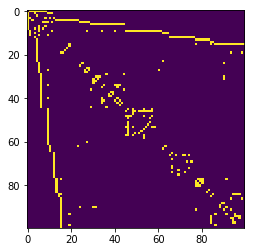

In [62]:
adj = nx.adjacency_matrix(g)
plt.imshow(adj.todense()[:100, :100])

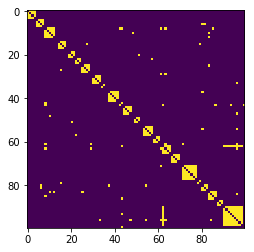

In [63]:
adj_hat = nx.adjacency_matrix(g_hat)
plt.imshow(adj_hat.todense()[:100, :100])